In [28]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem  
import matplotlib.pyplot as plt  
import networkx as nx  
import pygraphviz  
from networkx.drawing.nx_agraph import graphviz_layout  
from rdkit.Chem import rdchem  

In [29]:
def inchi_to_smiles(inchi_string):
    # 使用rdkit从InChI字符串创建分子对象  
    mol = Chem.MolFromInchi(inchi_string)

    # 检查分子对象是否成功创建  
    if mol is not None:
        # 将分子对象转化为SMILES字符串  
        smiles = Chem.MolToSmiles(mol, isomericSmiles=False, canonical=True)
        return smiles
    else:
        return None

    # 示例InChI字符串  
inchi_string = "InChI=1/C10H11N3O3S/c1-7-6-10(12-16-7)13-17(14,15)9-4-2-8(11)3-5-9/h2-6H,11H2,1H3,(H,12,13)"

# 转化InChI为SMILES  
smiles_string = inchi_to_smiles(inchi_string)

# 输出结果  
print("SMILES:", smiles_string)

SMILES: Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1


In [30]:
mol = Chem.MolFromSmiles('Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1')  #使用SMILES字符串

Wiener Index of the compound from SMILES: 535.0


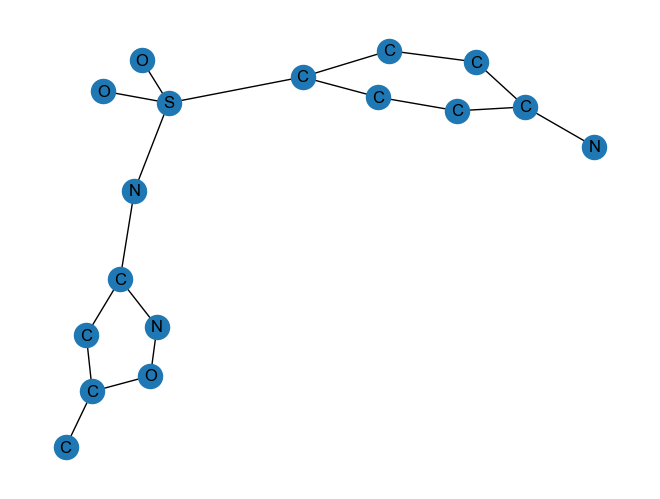

In [31]:
# 假设你有一个SMILES字符串表示磺胺甲恶唑  
smiles = 'Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1'  # 这是一个示例SMILES，不一定是磺胺甲恶唑的精确结构  
  
# 使用RDKit从SMILES字符串创建分子对象  
mol = Chem.MolFromSmiles(smiles)  
  
# 将RDKit分子对象转换为NetworkX图  
def mol_to_graph(mol):  
    g = nx.Graph()  
      
    # 添加原子作为节点  
    for atom in mol.GetAtoms():  
        g.add_node(atom.GetIdx(), label=atom.GetSymbol())  
      
    # 添加化学键作为边  
    for bond in mol.GetBonds():  
        begin_idx = bond.GetBeginAtomIdx()  
        end_idx = bond.GetEndAtomIdx()  
        order = bond.GetBondTypeAsDouble()  # 可以获取键的阶数（单键、双键等）  
        g.add_edge(begin_idx, end_idx, weight=order)  
    return g  
  
# 转换  
g = mol_to_graph(mol)  
# 计算Wiener指数  
wi = nx.wiener_index(g)  

# 打印Wiener指数  
print(f"Wiener Index of the compound from SMILES: {wi}")  
  
# 绘图（可选）  
# RDKit有自己的绘图功能，如果想用NetworkX绘图并显示原子标签，需要手动添加标签  
pos = nx.spring_layout(g)  # 使用NetworkX的布局函数  
nx.draw(g, pos, with_labels=True, labels={node: g.nodes[node]['label'] for node in g.nodes()})  
  
# 显示图形（在某些环境中可能需要plt.show()）  
import matplotlib.pyplot as plt  
plt.show()

In [32]:
molecular_weight = Descriptors.MolWt(mol)
print("Molecular Weight:", molecular_weight)

Molecular Weight: 253.28300000000002


In [33]:
from rdkit.Chem import Crippen  
logp = Crippen.MolLogP(mol)  
print(f"预测的LogP值为: {logp}")  

预测的LogP值为: 1.3660199999999998


In [34]:
if mol is not None:  
    # 初始化氢键供体和氢键受体的计数器  
    hbond_donors = 0  
    hbond_acceptors = 0  
  
    # 遍历分子中的每个原子  
    for atom in mol.GetAtoms():  
        # 获取原子的符号  
        atom_symbol = atom.GetSymbol()  
  
        # 判断是否为氢键供体（如N, O, F等）  
        if atom_symbol in ['N', 'O', 'F']:  
            # 检查原子是否有孤对电子  
            if atom.GetNumExplicitHs() > 0:  
                hbond_donors += 1  
  
        # 判断是否为氢键受体（如O, N, C=O, C=N等）  
        if atom_symbol == 'O':  
            # 对于氧原子，通常认为都是氢键受体  
            hbond_acceptors += 1  
        elif atom_symbol == 'N':  
            # 对于氮原子，检查是否连接到电负性较大的原子（如O）  
            for neighbor in atom.GetNeighbors():  
                if neighbor.GetSymbol() == 'O':  
                    hbond_acceptors += 1  
                    break  
        elif atom_symbol == 'C':  
            # 对于碳原子，检查是否形成双键或三键  
            degree = atom.GetDegree()  
            if degree == 2:  
                # 检查两个邻居是否都是电负性较大的原子（如O, N, S等）  
                neighbors = atom.GetNeighbors()  
                if (neighbors[0].GetSymbol() in ['O', 'N', 'S'] and  
                    neighbors[1].GetSymbol() in ['O', 'N', 'S']):  
                    hbond_acceptors += 1  
  
    # 打印氢键供体和氢键受体的数量  
    print(f"氢键供体数（H-Bond Donors）: {hbond_donors}")  
    print(f"氢键受体数（H-Bond Acceptors）: {hbond_acceptors}")  
else:  
    print("无效的SMILES字符串")

氢键供体数（H-Bond Donors）: 0
氢键受体数（H-Bond Acceptors）: 4


In [35]:
topological_polar_surface_area = Descriptors.TPSA(mol)  # 注意：TPSA和Topological PSA通常是同一个值  
print(f"拓扑极性表面积 (Topological Polar Surface Area): {topological_polar_surface_area}")  

拓扑极性表面积 (Topological Polar Surface Area): 98.22


In [36]:
if mol is not None:  
    formal_charges = [atom.GetFormalCharge() for atom in mol.GetAtoms()]  
    print(f"形式电荷 (Formal Charges): {formal_charges}")  
else:  
    print("无效的SMILES字符串")

形式电荷 (Formal Charges): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
